In [1]:
%matplotlib widget

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from PIL import Image

im_wfence = Image.open("./NS_data/E7.3_80x80_py_40M_recall.k3.r.40000000.nnd-ref.png")

class BlockImageEditor:
    """
    A block-based image editor which allows interactive modifications of an image.
    
    How to use:
    -----------
    right click: change color of current block to selected color.
    left click:  Copy the color of an existing block.
    middle button click: Returns block to its original color

    Attributes:
    -----------
    fence : bool
        If True, a 2-pixel thick fence will be drawn around each block. Use when the original image has a fence.
    output_name : str
        The filename where the edited image will be saved.
    img_array : ndarray
        A numpy array representation of the input image.
    block_size : int, optional, default=12
        The size (both width and height) of each block in the image.
    color_picker : ColorPicker
        A widget for picking colors interactively.
    image : ndarray
        A numpy array representing the current state of the edited image.
    initial_image : ndarray
        A numpy array storing the original state of the image for undo operations.
    fig, ax : Figure, Axes
        Matplotlib's figure and axes objects for displaying the image.
    rgb : tuple
        The current color selected in the color picker, represented in RGB format.
    save_button : Button
        A widget button to save the current state of the edited image.

    Methods:
    --------
    onclick(event) -> None
        Handles mouse click events for the image display.
    update_block_color(row, col, color) -> None
        Updates the color of a specific block in the image.
    hex_to_rgb(value) -> tuple
        Converts a HEX color code to an RGB tuple.
    on_color_change(change) -> None
        Handles changes in the color picker widget and updates the `rgb` attribute.
    save_image(change) -> None
        Saves the current image to a specified filename without surrounding whitespace.

    Parameters:
    -----------
    image : ndarray or Image object
        The input image to be edited.
    output_name : str
        The filename where the edited image will be saved.
    block_size : int, optional, default=12
        The size (both width and height) of each block in the image.
    fence : bool, optional, default=False
        If True, a 2-pixel thick fence will be drawn around each block.
    """
        
    def __init__(self, image, output_name, block_size=12, fence=False):
        # Modify later to take in images
        self.fence = fence
        self.output_name = output_name
        self.img_array = np.array(image)
        [xdim, ydim, zdim] = np.shape(self.img_array)
        #assert xdim == ydim, "Error: not a square SOM"
        blocks_shape = (xdim // block_size, 
                        ydim // block_size)
        self.block_size = block_size
        self.color_picker = widgets.ColorPicker(value='#0000FF',
                                                description='Pick a color:')
        
        self.color_picker.observe(self.on_color_change, names='value')
        
        display(self.color_picker)
        
        self.image = self.img_array
        self.initial_image = np.array(image)
        
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.ax.imshow(self.image)
        self.ax.axis('off')
        
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        self.rgb = self.hex_to_rgb(self.color_picker.value)
        
        self.save_button = widgets.Button(description="Save Image")
        self.save_button.on_click(self.save_image)
        display(self.save_button)
        
    def onclick(self, event):
        row, col = int(event.ydata // self.block_size), int(event.xdata // self.block_size)
        # Find the block index
        if event.button == 1:
            
            self.update_block_color(row, col, self.rgb)
            #self.update_block_color(row, col, new_color)
            
        if event.button ==2:
            # remember original image and undo this way
            clicked_box = self.initial_image[(self.block_size//2)+row*self.block_size,
                                             (self.block_size//2)+col*self.block_size]
            self.update_block_color(row, col, clicked_box)
            
        if event.button == 3:
            clicked_color = self.image[(self.block_size//2)+row*self.block_size,
                                       (self.block_size//2)+col*self.block_size]
            # Convert RGB to HEX and update the color picker
            hex_value = '#{:02x}{:02x}{:02x}'.format(clicked_color[0], clicked_color[1], clicked_color[2])
            self.color_picker.value = hex_value
            return  
        
    def update_block_color(self, row, col, color):
        if self.fence:
            start_row, end_row = row*self.block_size+2, (row+1)*self.block_size
            start_col, end_col = col*self.block_size, (col+1)*self.block_size-2
        if not self.fence:
            start_row, end_row = row*self.block_size, (row+1)*self.block_size
            start_col, end_col = col*self.block_size, (col+1)*self.block_size
        self.image[start_row:end_row, start_col:end_col] = color
        self.ax.imshow(self.image)
        self.fig.canvas.draw()
        #self.ax.savefig()
        
        color_picker
        
    def hex_to_rgb(self, value):
        # Remove the initial hash
        value = value.lstrip('#')
        # Convert to RGB
        return tuple(int(value[i:i+2], 16) for i in (0, 2, 4))

    def on_color_change(self, change):
        #print(change['new'])
        self.rgb = self.hex_to_rgb(change['new'])
        
    def save_image(self, change):
        file_name = self.output_name  # Choose a filename or get it from user input
        plt.imsave(file_name, self.image.astype(np.uint8))
        print(f"Image saved as {file_name}")


ColorPicker(value='#0000FF', description='Pick a color:')

Button(description='Save Image', style=ButtonStyle())

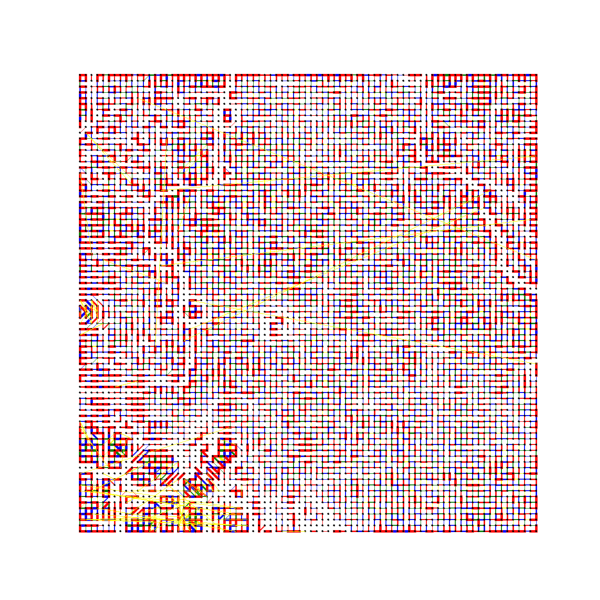

In [6]:
editor = BlockImageEditor(im_wfence, './NS_data/E7.3_80x80_py_40M_recall.remap1.png', fence=True)